

# Project: Investigate a Dataset - No-show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Summary

> **No-show
appointments
(original source on
[Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)**): This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Columns Description

#### 01 - PatientId
Identification of a patient
#### 02 - AppointmentID
Identification of each appointment
#### 03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
#### 04 - ScheduledDay
The day of the actual appointment, when they have to visit the doctor.
#### 05 - AppointmentDay
The day someone called or registered the appointment, this is before appointment of course.
#### 06 - Age
How old is the patient.
#### 07 - Neighbourhood
Where the appointment takes place.
#### 08 - Scholarship
True (1) of False (0) . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
#### 09 - Hipertension
True (1) of False (0)
#### 10 - Diabetes
True (1) of False (0)
#### Alcoholism
True (1) of False (0)
#### Handcap
True (1) of False (0)
#### SMS_received
1 or more messages sent to the patient.
#### No-show
True (1) of False (0) - Please note, True means that the patient did not show up



### Question(s) for Analysis
>**Tip**: at least one dependent variable and three independent variables. 

- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?




<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [129]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info() #To get info about any null cells, type and also a good overview of title naming
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#get column titles for copy paste into introduction paragraoh
for col in df.columns:
    print(col)

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


In [5]:
df.shape # In it's own cell, because the result did not print when in same cell as info and describe

(110527, 14)

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
sum(df.duplicated()) #check for duplicates

0

In [8]:
df['AppointmentID'].nunique() # Checking if Appointment ID is a true identifier should be 110527

110527

### Result from Data Wrangling
* There are no nulls, the dataset seems to be intact
* Appointment ID is the true identifier
* No duplications
* There is a strange lowest age -1

* TODO 1: Convert patient_id float64 to int for better readability
* TODO 2: Rewrite titles to correct syntax. Title names should be lowercase and with underscore where appropiate to follow Python syntax. Rewrite No-show to show_ups in preparation of TODO 4
* TODO 3: Schedule day and Appointment day are dates and needs to be set to type datetime
* TODO 4: Flip yes/no so that Yes is for Show ups and No for No Show
* TODO 5: Drop age -1

In [9]:
# TODO 1: Starting process changing float64 to int
df['PatientId'].nunique() # Checking Patient ID unique

62299

In [10]:
df['PatientId'] = df['PatientId'].astype(int) # Converting Patient ID to Integer

In [11]:
df['PatientId'].nunique() # Checking if Patient ID is still unique, should be same as before type change

62299

In [12]:
df.head() # Checking result

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# TODO 2: Change column names to Python standard, lowercase and underscore for spaces. Changing No-show to Show ups. Will later flip yes/no. 
df = df.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 
                   'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day', 'Age':'age', 
                   'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship', 'Hipertension':'hipertension', 
                   'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handcap', 
                   'SMS_received':'sms_received', 'No-show':'show_ups'}) 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_ups
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# TODO 3a Convert scheduled_day to datetime

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

In [15]:
# TODO 3b Convert appointment_day to datetime

df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [16]:
df['scheduled_day'].dt.day_name() #checking that the convertion worked

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
            ...    
110522      Tuesday
110523      Tuesday
110524    Wednesday
110525    Wednesday
110526    Wednesday
Name: scheduled_day, Length: 110527, dtype: object

In [17]:
df['appointment_day'].dt.day_name() #checking that the convertion worked

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: appointment_day, Length: 110527, dtype: object

In [18]:
# TODO 4: Flipping yes/no
df['show_ups'].value_counts() # Checking count of Yes and No

No     88208
Yes    22319
Name: show_ups, dtype: int64

In [19]:
df = df.replace('No', 'Coco') # Changing No to something completely different first, as when only one column has Yes and No. Column does not have to be specified
df['show_ups'].value_counts() # Checking I am doing the right thing :P

Coco    88208
Yes     22319
Name: show_ups, dtype: int64

In [20]:
df = df.replace('Yes', 'No') # Now changing Yes to No
df['show_ups'].value_counts()

Coco    88208
No      22319
Name: show_ups, dtype: int64

In [21]:
df = df.replace('Coco','Yes')# Now changing Coco to Yes
df['show_ups'].value_counts() # If correct Yes is No, and No is Yes

Yes    88208
No     22319
Name: show_ups, dtype: int64

In [121]:
# TODO 5 Drop -1

df = df.drop(df[df.age == -1].index)
df.describe() # check min age changed from -1 to 0

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

This is a very broad question and for this course I will narrow to look at a selection of factors:

1. How many appointments of all appointments are No shows. To get an understanding of proportions.
2. There seems to be about 2 appointments per patient. I would like to investigate if there are the same patients that do not show. It might be the statistic becomes misleading because of some few people pushing the numbers to either side. 
3. How important is age, gender?
4. Is there a correlation between human difficulties such as Hipertension, Diabetes, Handcap and not showing up?
5. Does weekday or time at the day matter
6. Does neighbourhoud matter



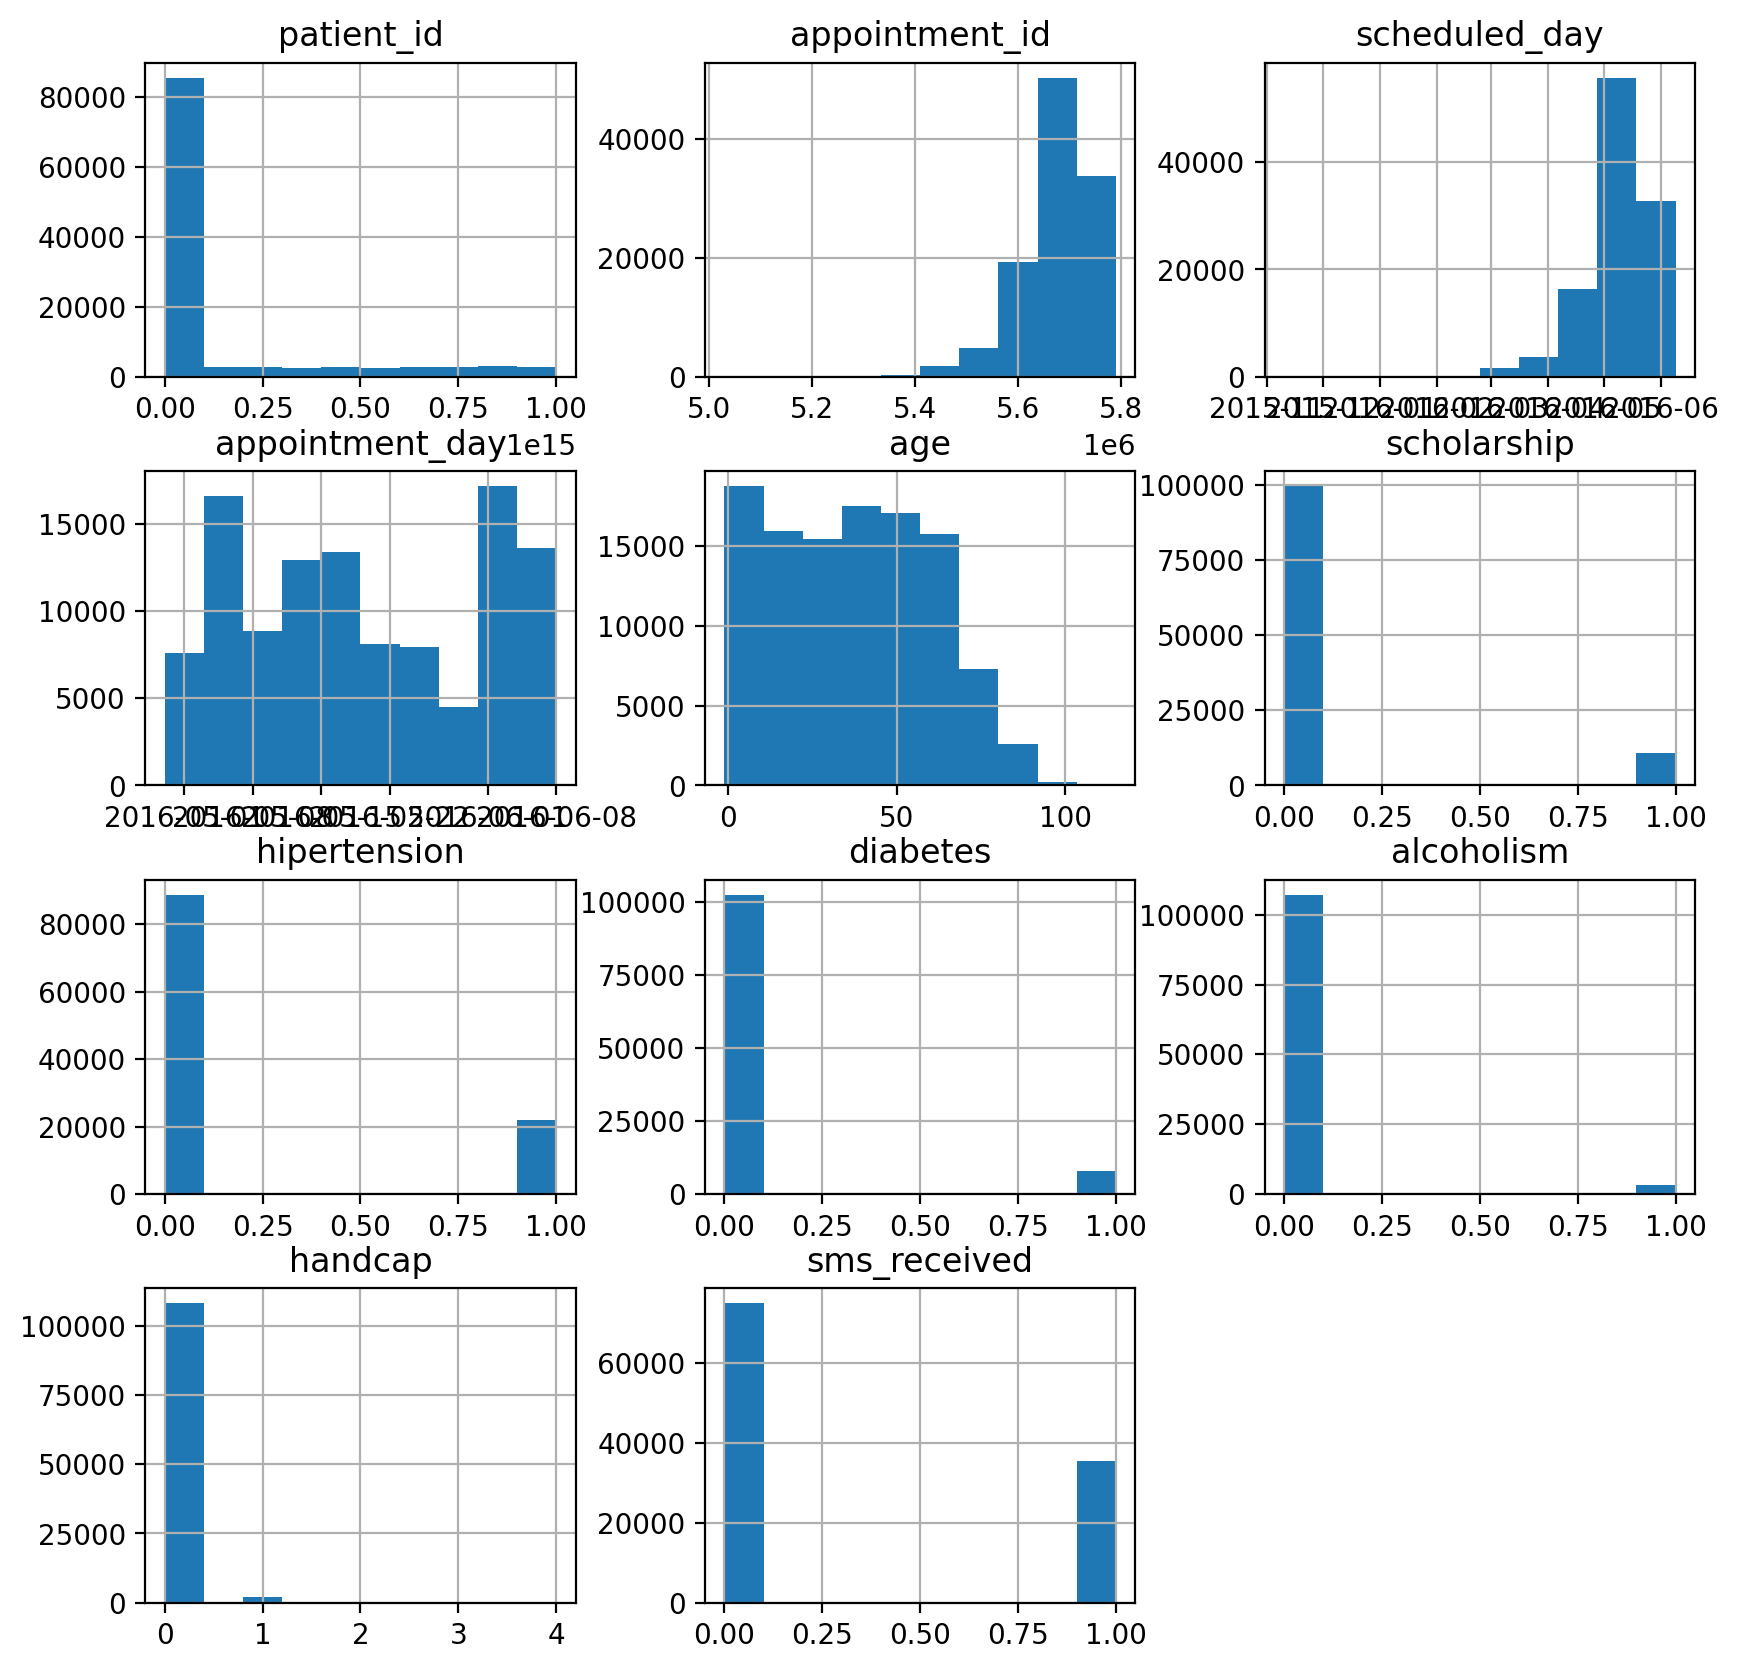

In [22]:
# 0. Hist exploring - just to see what happens
df.hist(figsize= (10,10));

<AxesSubplot:ylabel='Show Ups'>

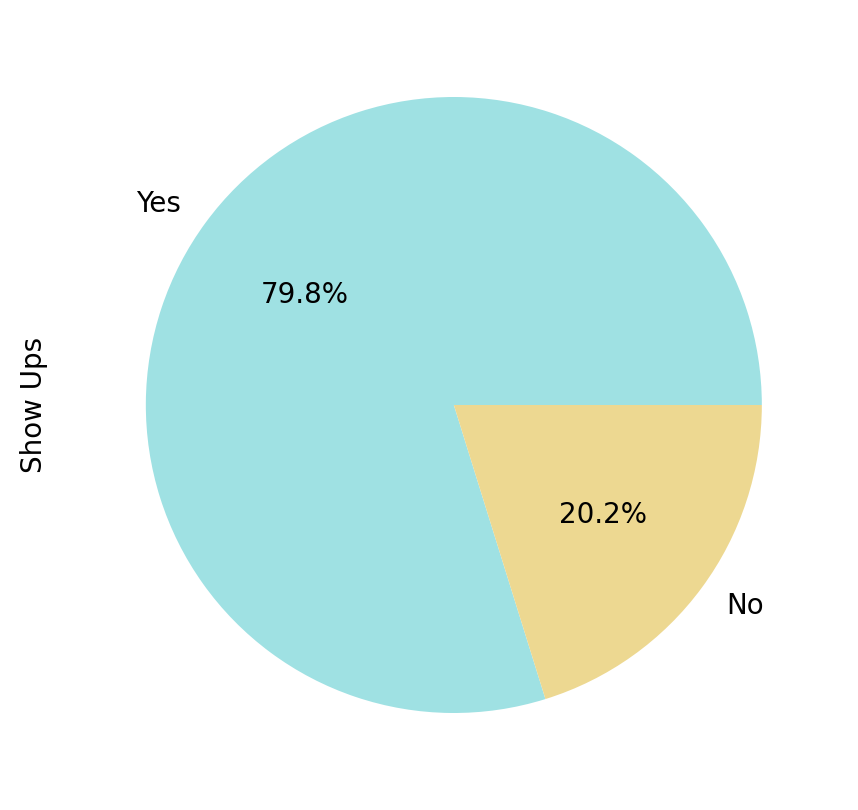

In [23]:
# 1. How many appointments of all appointments are No shows. 
# To get an understanding of proportions.
colors = ['#9fe1e3','#edd891'] # colors for my plotting theme
df['show_ups'].value_counts().plot.pie(ylabel='Show Ups', autopct='%1.1f%%', figsize=(5, 5), colors=colors) # simple pie when just two comparisons

In [24]:
# 1b. wanting to see why people not showing up, so I remove all yes and focus on no
nodf = df.drop(df[df.show_ups == 'Yes'].index)

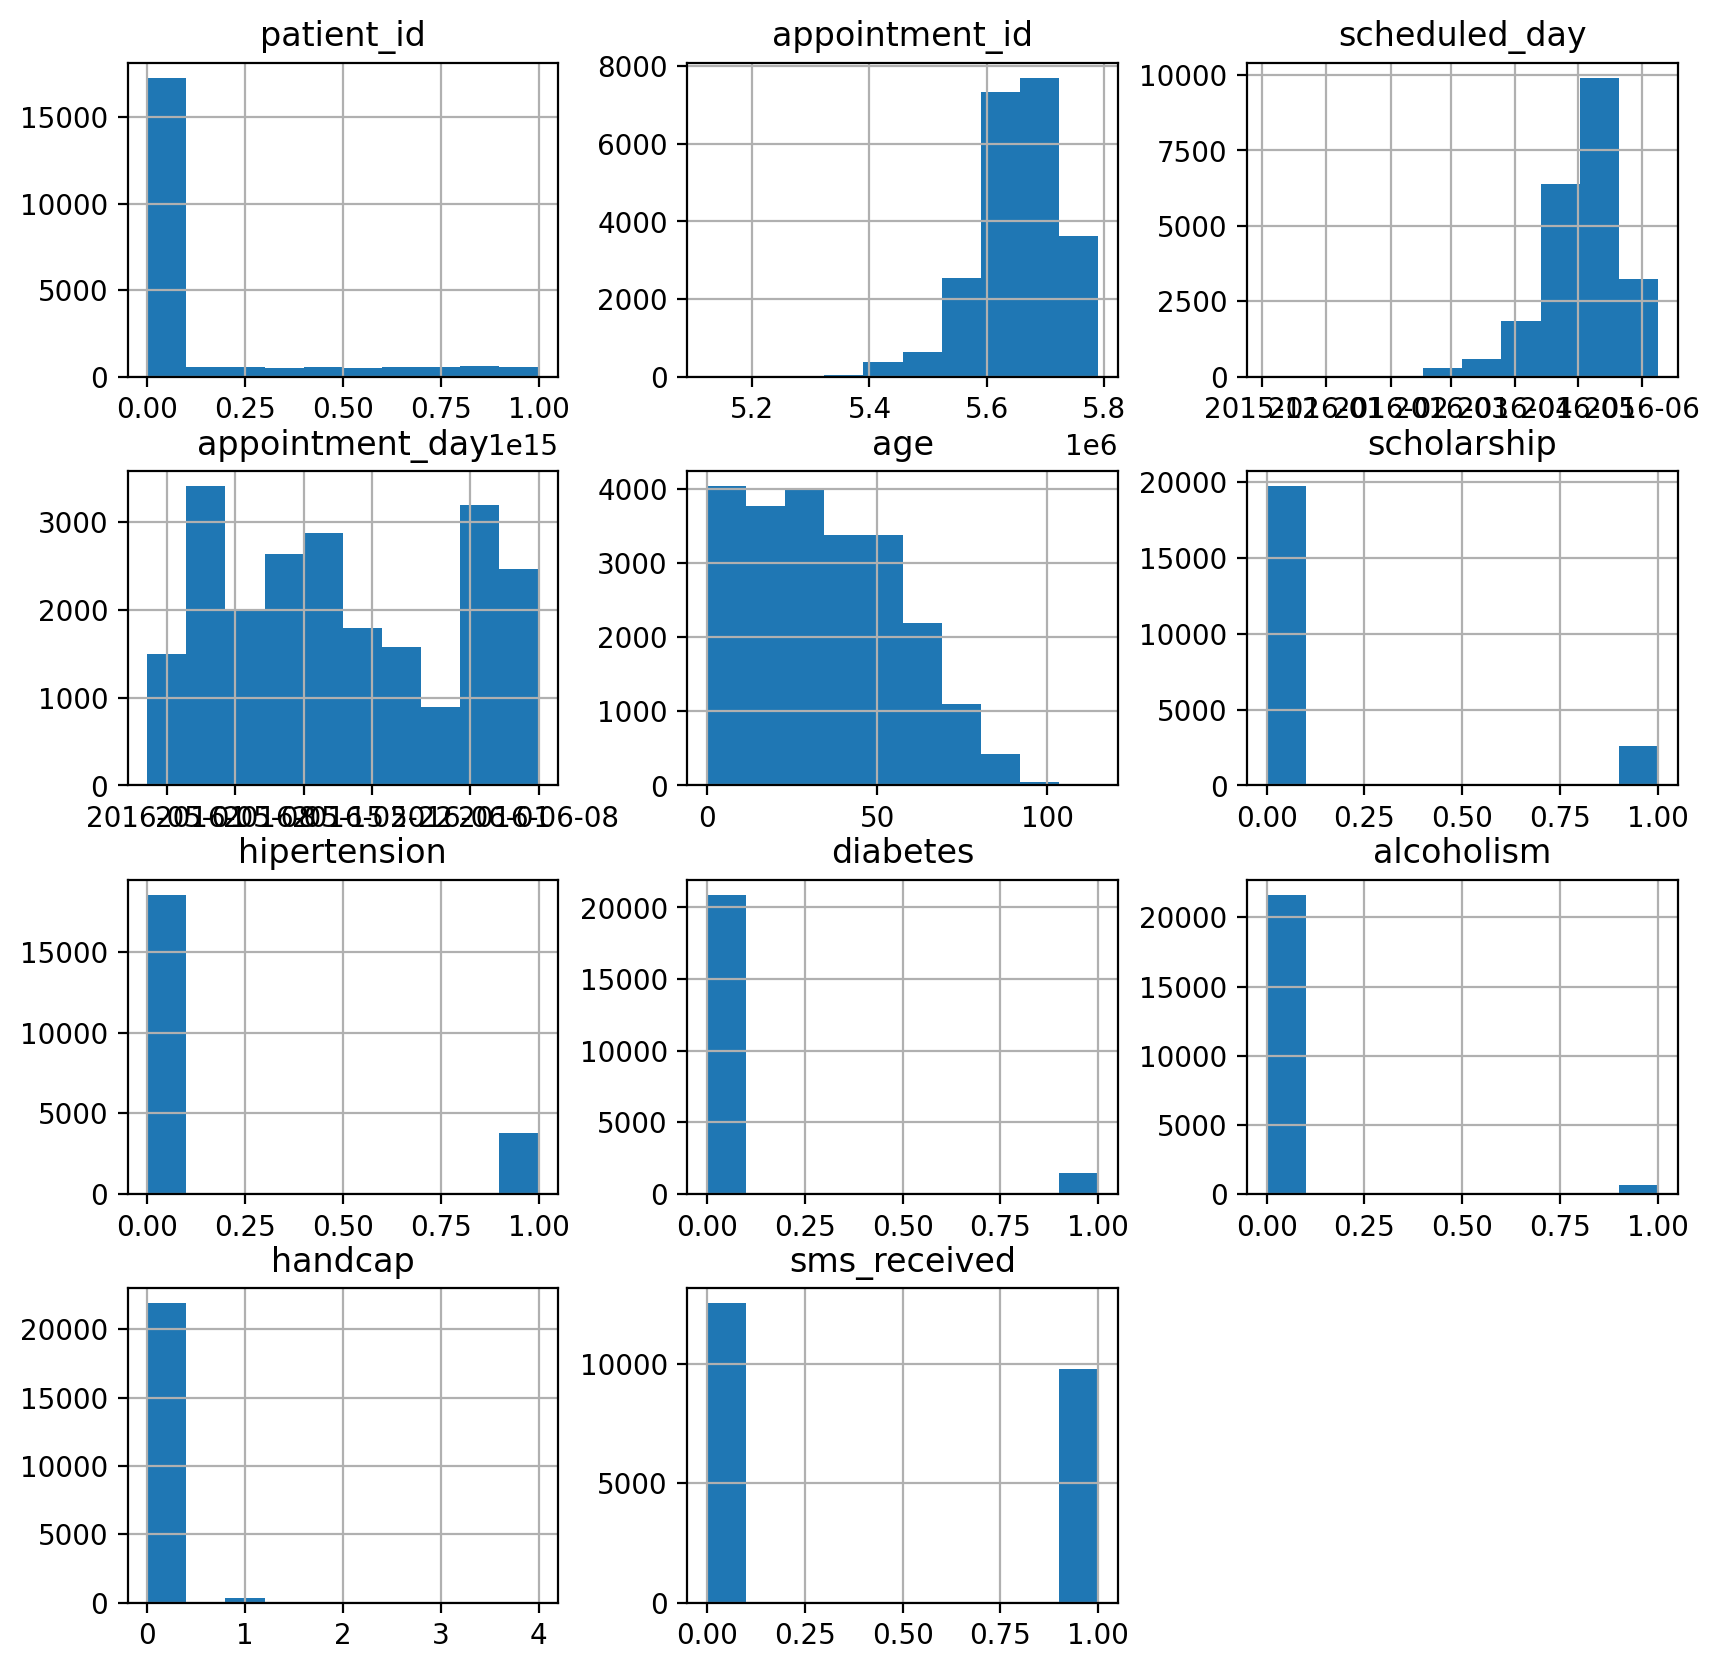

In [25]:
nodf.hist(figsize= (10,10)); # a quick explore

In [26]:
# 2. There seems to be about 2 appointments per patient. 
# I would like to investigate if there are the same patients that do not show. 
# It might be the statistic becomes misleading because of some few people pushing 
# the numbers to either side. 

# groupby patient ID and count number of Show ups equal to 'No'
df_count = df.groupby('patient_id')['show_ups'].apply(lambda x: (x=='No').sum()).reset_index(name='count')
count_the_count = df_count.groupby('count')['count'].count()

# view results
count_the_count # Note for later: look at the relation to how many scheduled appointments per patient_id



count
0     44636
1     14437
2      2418
3       516
4       162
5        58
6        33
7        13
8         9
9         3
10        4
11        4
12        1
13        1
14        1
15        1
16        1
18        1
Name: count, dtype: int64

In [29]:
patient_df = pd.DataFrame()
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [30]:
# Count of appointments per patient

patient_s = df.groupby('patient_id')['appointment_id'].count()
patient_s.value_counts()




1     37920
2     13895
3      5500
4      2367
5      1119
6       553
7       306
8       202
9       104
10       85
11       63
12       36
13       35
14       22
15       15
17       10
16       10
20        8
18        8
19        6
62        4
21        3
42        2
34        2
46        2
23        2
38        2
30        2
84        1
54        1
33        1
40        1
57        1
88        1
29        1
24        1
22        1
65        1
70        1
37        1
35        1
55        1
51        1
50        1
Name: appointment_id, dtype: int64

In [31]:
# 3. How important is age, gender?

# For this I decided to add a column with age-groups to get an easier overview of patterns

In [125]:
#first a little count
g = df['gender'].value_counts()
a = pd.DataFrame(df['age'].value_counts())
ag = df['age_group'].value_counts()
print('Gender count: \n','-'*40, '\n',g,'\n')
print('Age count:\n','-'*40, '\n',a.head(103),'\n')
print('Age groups count:\n' ,'-'*40, '\n',ag,'\n')

Gender count: 
 ---------------------------------------- 
 F    71839
M    38687
Name: gender, dtype: int64 

Age count:
 ---------------------------------------- 
       age
0    3539
1    2273
52   1746
49   1652
53   1651
..    ...
98      6
115     5
100     4
102     2
99      1

[103 rows x 1 columns] 

Age groups count:
 ---------------------------------------- 
 20-35     22592
51-65     22122
35-50     22100
66-80     10449
13-19      9375
7-12       7784
2-6        7440
infant     5812
81-        2852
Name: age_group, dtype: int64 



In [32]:
# adding age_group 
df.loc[df['age'] <=1, 'age_group'] = 'infant'
df.loc[df['age'].between(2,6), 'age_group'] = '2-6'
df.loc[df['age'].between(7,12), 'age_group'] = '7-12'
df.loc[df['age'].between(13,19), 'age_group'] = '13-19'
df.loc[df['age'].between(20,35), 'age_group'] = '20-35'
df.loc[df['age'].between(36,50), 'age_group'] = '35-50'
df.loc[df['age'].between(51,65), 'age_group'] = '51-65'
df.loc[df['age'].between(66,80), 'age_group'] = '66-80'
df.loc[df['age']>=81, 'age_group'] = '81-'

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_ups,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,51-65
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,51-65
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,51-65
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,7-12
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,51-65


In [40]:
# 3. How important is age, gender 

# Creating a series for count for yes or no shows devided in main category age group
# and minor category gender. 
showup_age_gender_counts_s = df.groupby(['show_ups' , 'age_group', 'gender']).count()['patient_id']

showup_age_gender_counts_s 


show_ups  age_group  gender
No        13-19      F          1540
                     M           894
          2-6        F           695
                     M           752
          20-35      F          3938
                     M          1421
          35-50      F          3136
                     M          1356
          51-65      F          2532
                     M          1129
          66-80      F          1082
                     M           515
          7-12       F           834
                     M           972
          81-        F           316
                     M           153
          infant     F           521
                     M           533
Yes       13-19      F          4515
                     M          2426
          2-6        F          2853
                     M          3140
          20-35      F         12559
                     M          4674
          35-50      F         12123
                     M          5485
          

In [41]:
showup_age_counts_s = df.groupby(['show_ups' , 'age_group']).count()['patient_id']

showup_age_counts_s 

show_ups  age_group
No        13-19         2434
          2-6           1447
          20-35         5359
          35-50         4492
          51-65         3661
          66-80         1597
          7-12          1806
          81-            469
          infant        1054
Yes       13-19         6941
          2-6           5993
          20-35        17233
          35-50        17608
          51-65        18461
          66-80         8852
          7-12          5978
          81-           2383
          infant        4759
Name: patient_id, dtype: int64

In [46]:
su_count_df = pd.DataFrame(showup_age_counts_s)

patient_id
show_ups age_group            
No       13-19            2434
         2-6              1447
         20-35            5359
         35-50            4492
         51-65            3661

In [43]:
# Making a new dataframe based on the showup_counts series for plotting. 
# There are probably many faster ways to do this
Showups = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', ]
Agegroups = ['13-19', '2-6', '20-35', '35-50', '51-65', '66-80', '7-12', '81-', 'infant']
Nopatients = [2434, 1447, 5359, 4492, 3661, 1597, 1806, 469, 1054]
Yespatients = [6941, 5993, 17233, 17608, 18461, 8852, 5978, 2383, 4759]
su_count_df['show_ups2'] = Showups
new_df = pd.DataFrame()
new_df['age_group'] = pd.DataFrame(Agegroups)
new_df['no_patients'] = pd.DataFrame(Nopatients)
new_df['yes_patients'] = pd.DataFrame(Yespatients)



In [44]:
# Store the new_df in a more namy df. Now the original is intact and I can feel more safe fixing the plot
yesno_count = new_df
yesno_count

,age_group,no_patients,yes_patients
0,13-19,2434,6941
1,2-6,1447,5993
2,20-35,5359,17233
3,35-50,4492,17608
4,51-65,3661,18461
5,66-80,1597,8852
6,7-12,1806,5978
7,81-,469,2383
8,infant,1054,4759


In [47]:
yesno_count.iloc[5] = ['36-50', 4492, 17608] #fixing 35 --> 36

In [48]:
yesno_count # order has been fixed in a deleted

,age_group,no_patients,yes_patients
0,13-19,2434,6941
1,2-6,1447,5993
2,20-35,5359,17233
3,35-50,4492,17608
4,51-65,3661,18461
5,36-50,4492,17608
6,7-12,1806,5978
7,81-,469,2383
8,infant,1054,4759


In [ ]:
# this cell has been used to fix order of age group in yesno_count before plotting. 
# yesno_count.iloc[2], yesno_count.iloc[3] = yesno_count.iloc[3], yesno_count.iloc[2] # fixing order


<AxesSubplot:xlabel='age_group'>

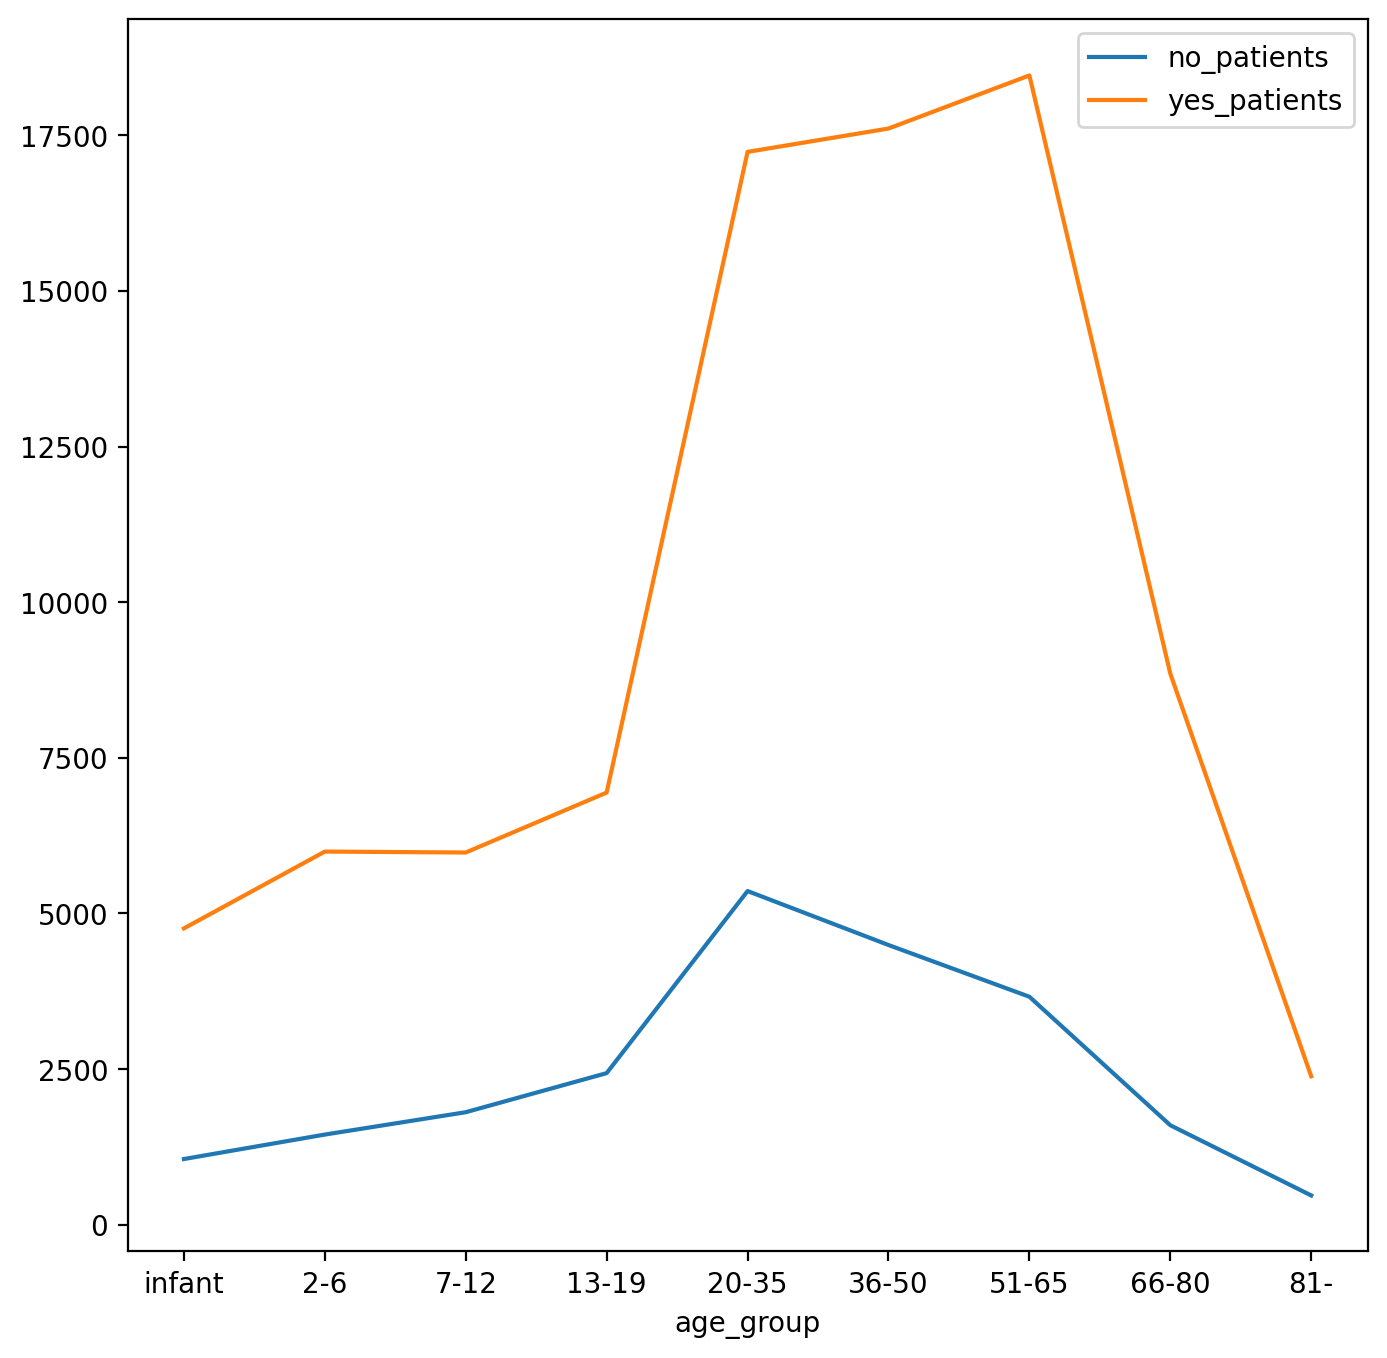

In [574]:
# DO NOT RERUN - Plotting. Order is correct without rerunning. If rerun order will be lost
yesno_count.plot(x="age_group", y=['no_patients', 'yes_patients'],
        kind="line", figsize=(8, 8))

In [49]:
# Start of alternative plotting about age vs no/yes show ups
# Get total counts for each no shows
showup_totals = df.groupby('show_ups').count()['appointment_id']
showup_totals

show_ups
No     22319
Yes    88208
Name: appointment_id, dtype: int64

In [54]:
# gGt proportions by dividing no rating counts by total # of no samples
no_proportions = showup_age_counts_s['No'] / showup_totals['No']
no_proportions

age_group
13-19     0.109055
2-6       0.064833
20-35     0.240109
35-50     0.201263
51-65     0.164031
66-80     0.071553
7-12      0.080918
81-       0.021013
infant    0.047224
Name: patient_id, dtype: float64

In [55]:
# Get proportions by dividing yes rating counts by total # of yes samples
yes_proportions = showup_age_counts_s['Yes'] / showup_totals['Yes']
yes_proportions

age_group
13-19     0.078689
2-6       0.067942
20-35     0.195368
35-50     0.199619
51-65     0.209289
66-80     0.100354
7-12      0.067772
81-       0.027016
infant    0.053952
Name: patient_id, dtype: float64

In [56]:
ind = np.arange(len(no_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

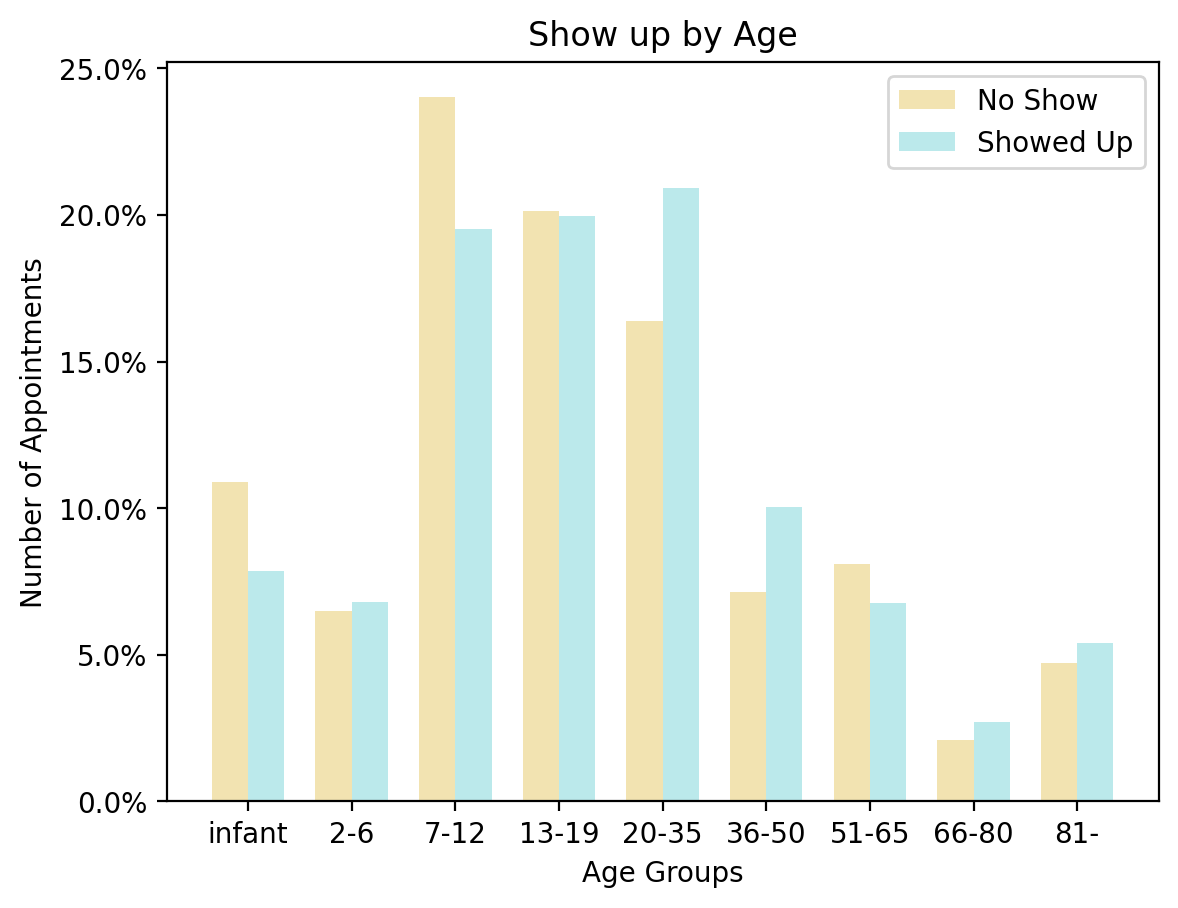

In [57]:
# plot bars 
no_bars = plt.bar(ind, no_proportions, width, color='#edd891', alpha=.7, label='No Show')
yes_bars = plt.bar(ind + width, yes_proportions, width, color='#9fe1e3', alpha=.7, label='Showed Up')
# title and labels
plt.ylabel('Number of Appointments')
plt.xlabel('Age Groups')
plt.title('Show up by Age')
locations = ind + width / 2  # xtick locations
labels = ['infant', '2-6', '7-12', '13-19', '20-35', '36-50', '51-65', '66-80', '81-']  # xtick labels
plt.xticks(locations, labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) # percentage
# legend
plt.legend()

In [58]:
# 4. Is there a correlation between human difficulties such as 
# Hipertension, Diabetes, Handcap and not showing up?

# filter using query to get no_showups

no_showups = df.query('show_ups =="No"')
no_showups.head()



,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_ups,age_group
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,No,20-35
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,No,35-50
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,No,20-35
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,No,35-50
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,20-35


In [59]:
# Start of series of cells to count number of No shows depending on one or
# combination of hipertension, diabetes and handcap
hdc = no_showups[['hipertension', 'diabetes', 'handcap']] # series to count
hdc_count = hdc[(hdc.hipertension >= 1) & (hdc.diabetes >= 1) & (hdc.handcap >=1)].sum(axis=1).count() # count if the patient has 1 or more of the difficulties




In [60]:
hdc_count # double check outcome

55

In [61]:
hd = no_showups[['hipertension', 'diabetes']]
hd_count = hd[(hd.hipertension >= 1) & (hd.diabetes >= 1)].sum(axis=1).count()


In [62]:
hd_count

1141

In [63]:
hc = no_showups[['hipertension', 'handcap']]
hc_count = hc[(hc.hipertension >= 1) & (hc.handcap >= 1)].sum(axis=1).count()


In [64]:
hc_count

164

In [65]:
dc = no_showups[['diabetes', 'handcap']]
dc_count = dc[(dc.diabetes >= 1) & (dc.handcap >= 1)].sum(axis=1).count()

In [66]:
dc_count

59

In [67]:
h = no_showups[['hipertension']]
h_count = h[(h.hipertension >= 1)].sum(axis=1).count()

d = no_showups[['diabetes']]
d_count = d[(d.diabetes >= 1)].sum(axis=1).count()

c = no_showups[['handcap']]
c_count = c[(c.handcap >= 1)].sum(axis=1).count()

In [68]:
print(h_count)
print(d_count)
print(c_count)

3772
1430
407


In [69]:
# Creation of dataframe for plotting human difficulties vs no shows
human_diff = pd.DataFrame()
human_diff['combination'] = ['Hipertension, Diabetes & Handcap', 
                             'Hipertension & Diabetes', 
                             'Hipertension & Handcap',
                             'Diabetes & Handcap',
                             'Hipertension',
                             'Diabetes',
                             'Handcap']
human_diff['no_counts'] = [hdc_count, hd_count, hc_count, dc_count, h_count, d_count, c_count]

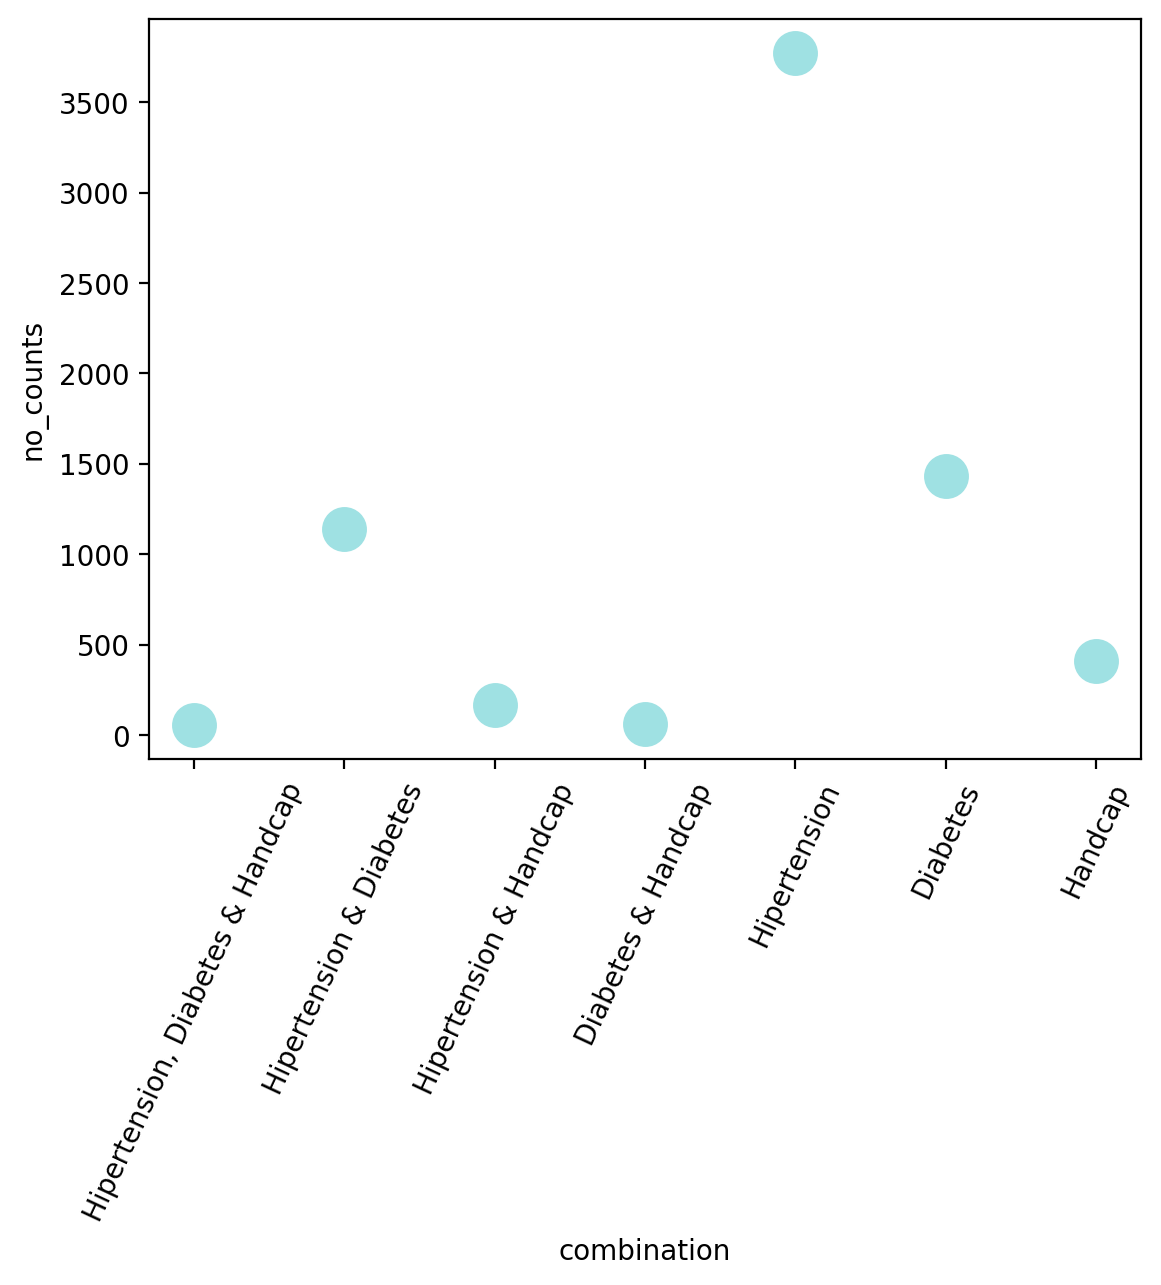

In [70]:
# Plotting

ax1 = human_diff.plot.scatter(x='combination',
                      y='no_counts', 
                              s=230,c='#9fe1e3')

for tick in ax1.get_xticklabels():
    tick.set_rotation(65)
    



In [72]:
# Human Difficulty-percentage of total no-show

sum_hd = human_diff['no_counts'].sum()
no_total = no_showups['show_ups'].count()

percentage = sum_hd / no_total * 100

percentage

31.488865988619562

In [73]:
# 5. Does weekday or time at the day matter for no shows?
# starting looking att weekday
weekdays_noshow = pd.DataFrame(no_showups['scheduled_day'].dt.day_name())
weekdays_noshow['scheduled_day'].value_counts()


Tuesday      5291
Wednesday    4879
Monday       4561
Friday       3887
Thursday     3700
Saturday        1
Name: scheduled_day, dtype: int64

In [74]:
# looking at hours
hours_noshow_s = no_showups['scheduled_day'].dt.hour
hours_noshow_s.value_counts()


7     2911
8     2804
9     2526
10    2440
14    2070
11    1928
13    1891
15    1873
16    1317
12    1104
17     722
6      303
18     285
19     114
20      30
21       1
Name: scheduled_day, dtype: int64

In [127]:
# 6. Does neighbourhoud matter?

df['neighbourhood'] = df['neighbourhood'].str.title() #fixing nicer reading for plot
neigh_counts_s = df.groupby(['show_ups', 'neighbourhood']).count()['patient_id']

neigh_counts_s

show_ups  neighbourhood      
No        Aeroporto                 1
          Andorinhas              521
          Antônio Honório          50
          Ariovaldo Favalessa      62
          Barro Vermelho           91
                                 ... 
Yes       São José               1549
          São Pedro              1933
          Tabuazeiro             2559
          Universitário           120
          Vila Rubim              710
Name: patient_id, Length: 160, dtype: int64

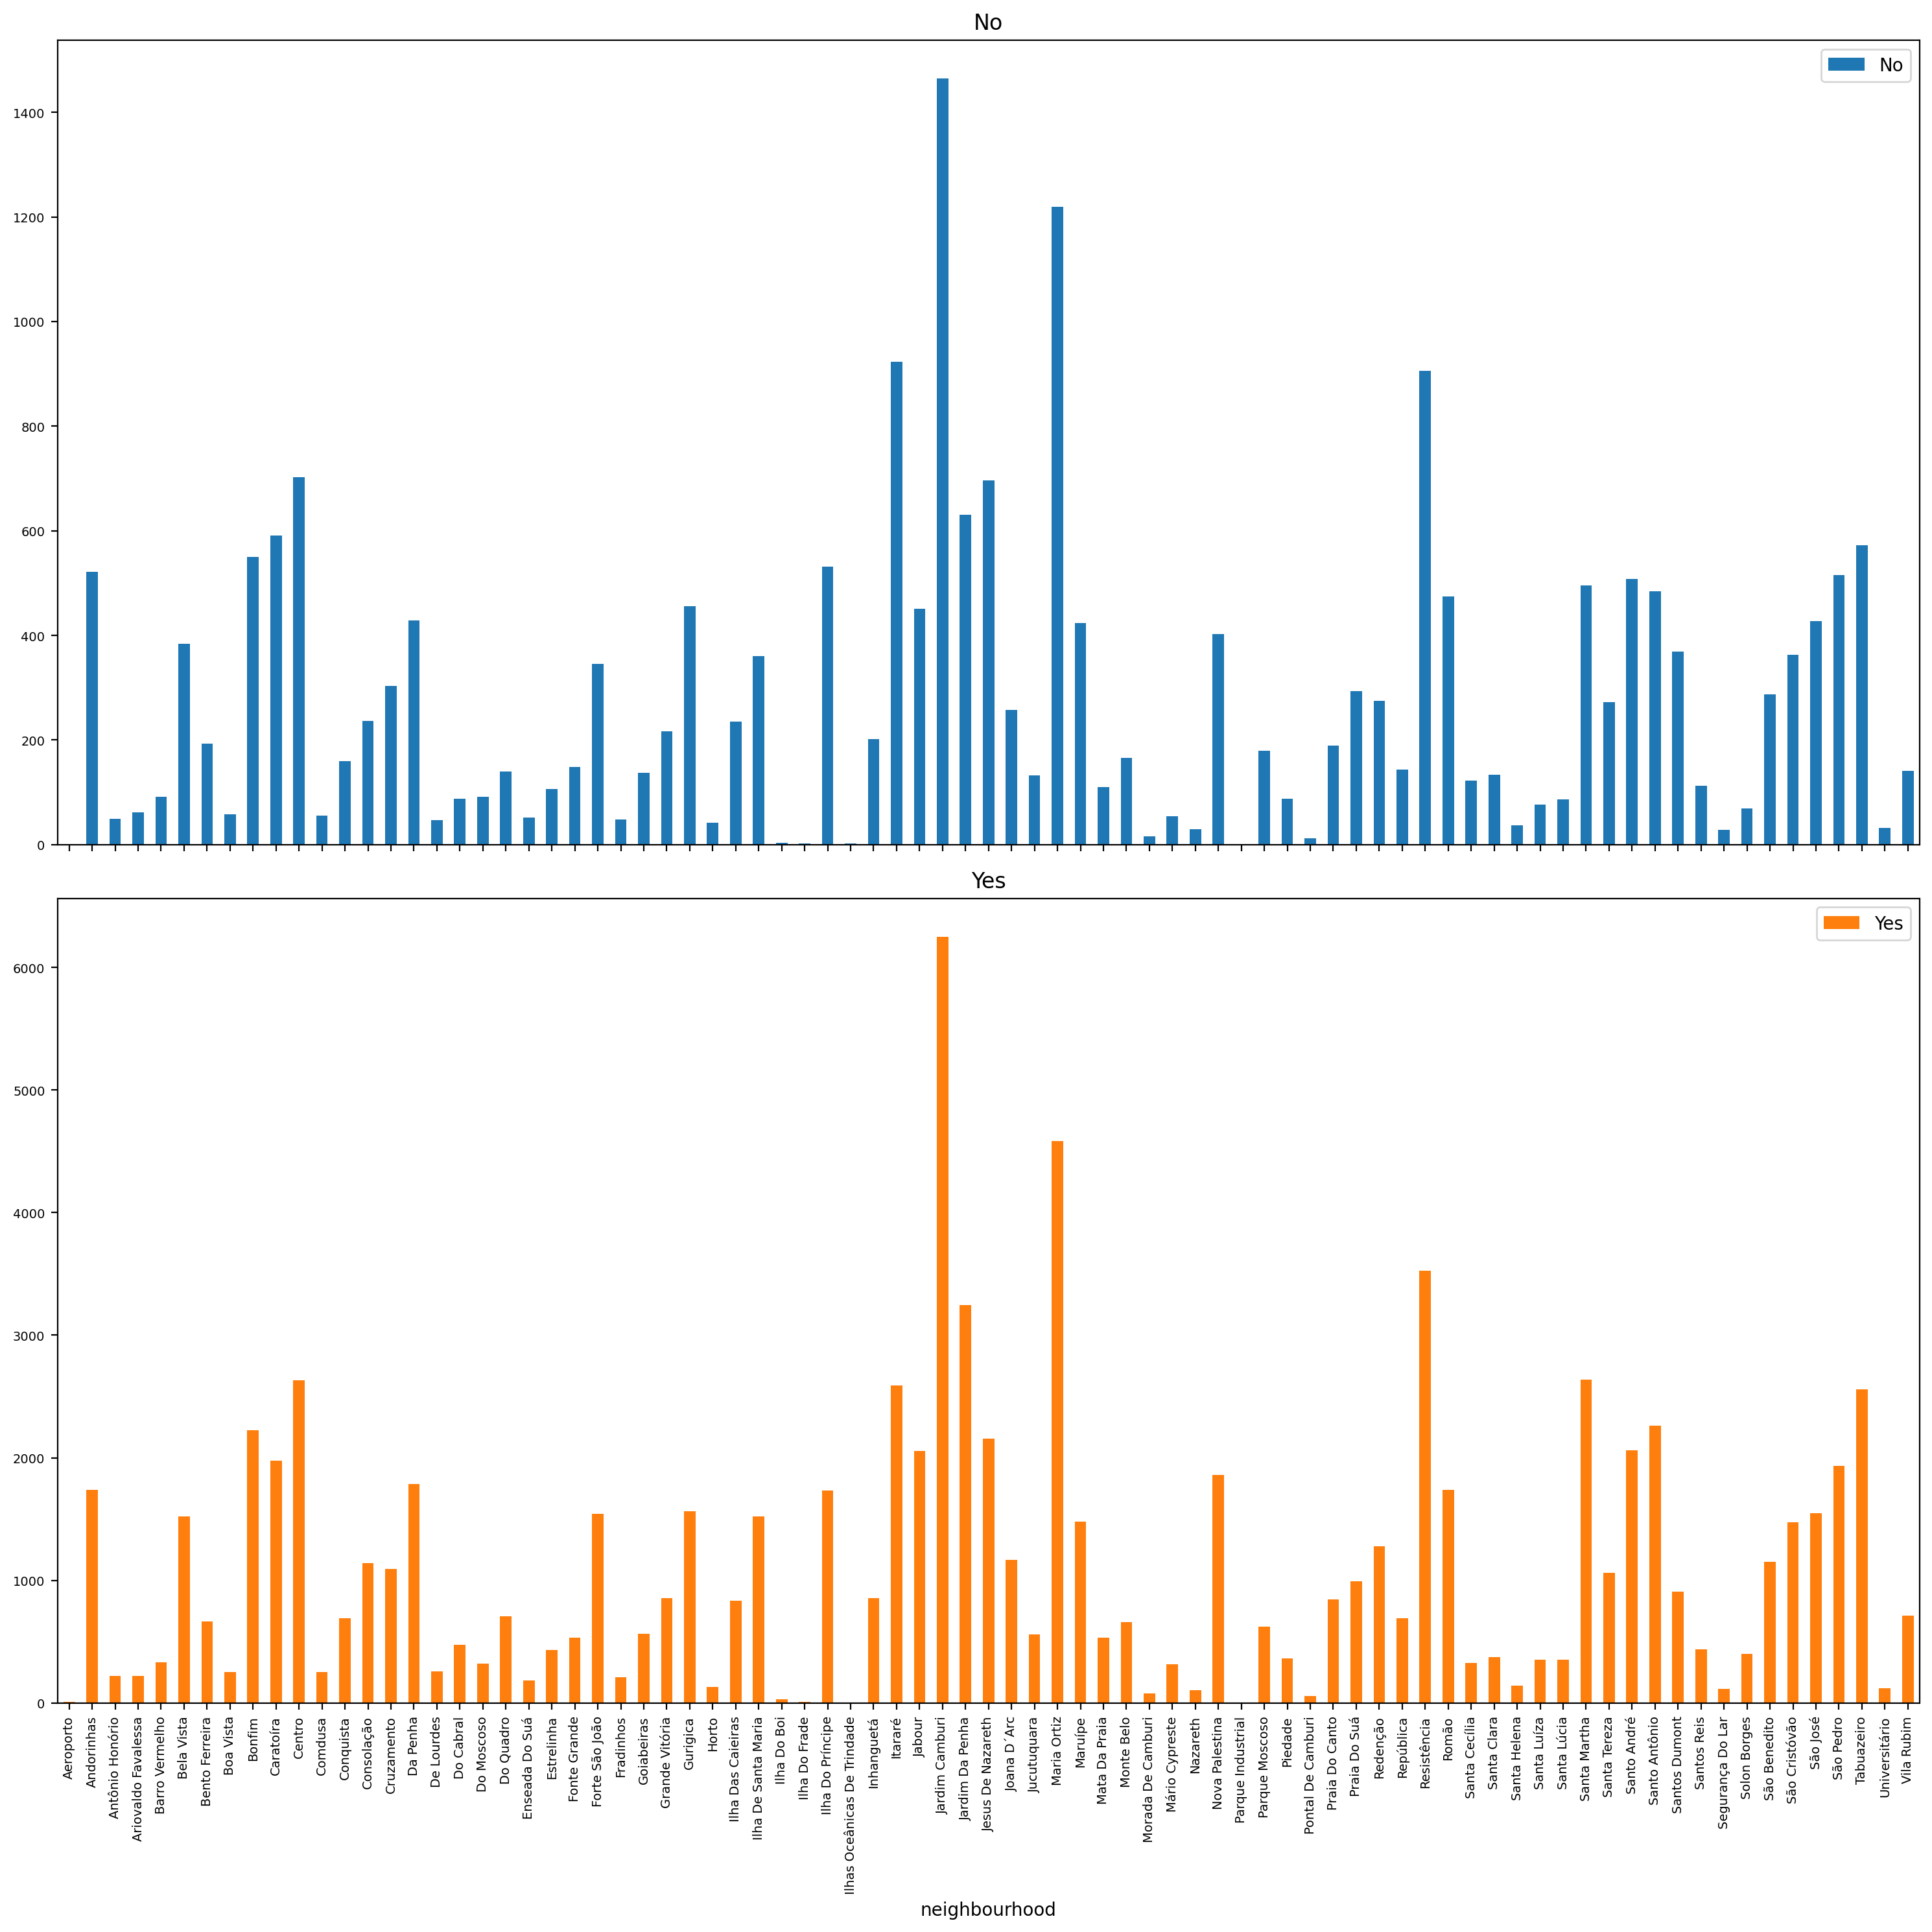

In [106]:
# Plotting
ax = neigh_counts_s.unstack(level=0).plot(kind='bar', fontsize=7, subplots=True, rot=90, figsize=(15, 15), layout=(2, 1))
plt.tight_layout()

<a id='conclusions'></a>
## Conclusions

**1. Yes/No show proportions:** Yes 79.8%  (88 208) and No 20,2% (22 319)

**2. Patients per appointment:** Most patients 44 636 have never missed an appointment . Those who have missed 1 or 2 are also quite common but from it drops significantly. Look at dropouts here. Yet there are single patients having up to 18 scheduled appointments. Lets look at the ratio of them. Looking at number of appointments per patients it is most common with one appointment and relatively common with up to five. But without going deeper it’s not possible if they really correlate. It would be interesting to see if there is a connection between having many appointments and also not showing up and by this also look at any potential pattern with alcoholism, scholarship and diseases. 

**3. Age and Gender:** There are almost double amount of women that has an appointment 71 840 female vs 38 687 male. Age: Newborn babies are the single largest group of patients but looking at age-groups majority of patients are between 20-65. Looking at compare age group combined with gender in a list  or just age group shows similarities with the total yes/no portions. It would require to calculate and visualises each age group + gender to be really sure this is not a significant factor for predicting if the patient might not show up or not. When plotting age group it is though clear that age group 20-35 has the most amount of no shows, but they are also the largest group so relatively smaller and actually more likely to show up than the younger generation that are the ones most likely not to show up. 
Relatively the age group 51-65 are the ones showing up more. 

**4. Human Difficulties** Hipertension alone is a big portion of not showing up. And all human difficulties together is 31 % of the total no shows indicating this is an important factor. 

**5. Weekday or Time of day:** Weekday does not seem to matter that much but most no shows is happening on Tuesdays, least at Thursdays. There is also 1 no show on Saturday but this might be wrong data as when the other days the numbers varies between 5291 and 3700.
Looking at time people are more likely to show really early or late. This might be because of working hours and could be a factor. Would be interesting to look on this in combination with age group

**6. Neighbourhood:** seem to matter. It would need to do perceptual comparison to see the actual correlation. 


### Summary
Human difficulties are an significant factor for not showing up. Also where you live seems important. I have not looked into several nested datasets which would have shown more. I have not looked alcoholism or scholarship which might also be an important factors in combination with age and neighbourhood.  

#### Comment
I would like to investigate so much more and dig deeper but not time in this course to do more. I'm too still quite new and every look up taking quite some time.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])